In [73]:
import numpy as np
import scipy as sp
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 原因：確率変数として扱われる母数

In [106]:
shita=np.array([0.2, 0.3, 0.5])

### 母数を確率変数として与えられる事前確率分布(理由不十分の原則)

In [111]:
def w(i):
    if(i>len(shita)):
        return 0
    else:
        if(shita[i]==0.2):
            return 1/3
        elif(shita[i]==0.3):
            return 1/3
        elif(shita[i]==0.5):
            return 1/3
        else:
            return 1
w(2)

0.3333333333333333

<BarContainer object of 3 artists>

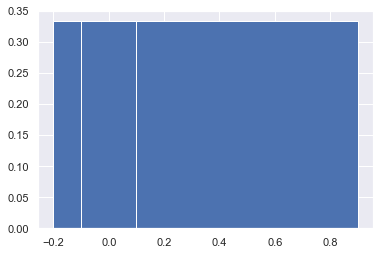

In [113]:
before=[w(i) for i in range(len(shita))]
plt.bar(shita,before)

### 標本によって更新される事故確率分布

In [114]:
def w_(i,z,f):
    w_array = np.array([w(i) for i in range(len(shita))])
    f_array = np.array([f(z,i) for i in range(len(shita))])
    return w(i)*f(z,i)/sp.sum(w_array*f_array)

### 結果の標本から得られる尤度関数

In [115]:
def f(z,i):
    p=shita[i]
    n=len(z)
    k=sp.sum(z)#1の個数を数える
    return st.binom.pmf(k,n,p)

### 実験

In [118]:
z=np.array([1,1,1,1,1,1,1,1,0,0,0,0])
after=[w_(i,z,f) for i in range(3)]
after

[0.00401842305575747, 0.06036955039868175, 0.9356120265455609]

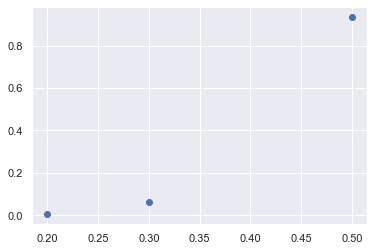

In [120]:
plt.plot(shita,after,"o")

<BarContainer object of 3 artists>

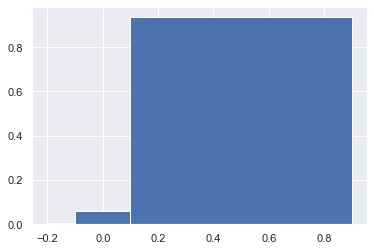

In [121]:
plt.bar(shita,after)

In [21]:
(st.binom.pmf(8,12,0.7)*0.5)/(0.5*st.binom.pmf(8,12,0.7)+0.5*st.binom.pmf(8,12,0.3))

0.967365028203062

In [24]:
(st.binom.pmf(8,12,0.7)*0.5)

0.11556984804749977

In [23]:
(0.5*st.binom.pmf(8,12,0.7)+0.5*st.binom.pmf(8,12,0.3))

0.11946870589499976